# Урок 11. Качество модели и её улучшение
Тебе предстоит разработать модель машинного обучения для предсказания вероятности оттока клиентов в телекоммуникационной компании. У тебя есть набор данных, который содержит различные признаки о клиентах, такие как возраст, пол, тип подключения, длительность пользования услугами и т.д.

Твоя задача состоит в следующем:

1. Загрузить данные и провести предварительный анализ данных.

2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

3. Разделить данные на обучающую и тестовую выборки.

4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.

1. Загрузить данные и провести предварительный анализ данных.

Импорт необходимых библиотек:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных:

In [29]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Предварительный анализ данных:

In [5]:
# Информация о данных:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Статистическое описание числовых признаков:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


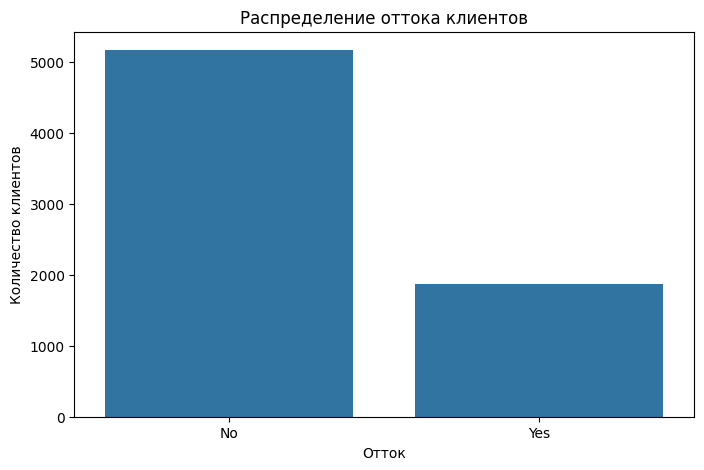

In [30]:
# Проверка распределения целевой переменной:

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Распределение оттока клиентов')
plt.xlabel('Отток')
plt.ylabel('Количество клиентов')
plt.show()

In [34]:
#Поиск пропущенных значений:
print(df.isnull().sum())

missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values[missing_values > 0])


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Пропущенные значения:
 Series([], dtype: int64)


2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

Удаление ненужных признаков:

In [14]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [15]:
# Удаление столбца customerID, который не несет информации для предсказания.
df.drop(columns=['customerID'], inplace=True)

Заполнение пропусков:

In [16]:
# Преобразование TotalCharges в числовой формат и заполнение пропусков.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(0, inplace=True)  # Заполнение пропусков нулями

Преобразование целевой переменной:

In [17]:
# Преобразуем целевую переменную Churn в бинарный формат.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Преобразование категориальных признаков:

In [18]:
# Используем one-hot кодирование для категориальных признаков.
df = pd.get_dummies(df, drop_first=True)

Нормализация данных:

In [19]:
# Нормализация числовых признаков для улучшения производительности модели.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

3. Разделить данные на обучающую и тестовую выборки.

In [20]:
# Определение признаков и целевой переменной:

X = df.drop(columns=['Churn'])  # Признаки
y = df['Churn']  # Целевая переменная

In [21]:
# Разделение данных на обучающую и тестовую выборки:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

In [22]:
# Выбор модели:
# В данном случае мы будем использовать случайный лес.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

In [23]:
# Обучение модели:

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Предсказания на тестовой выборке:

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

Accuracy: 0.7863733144073811


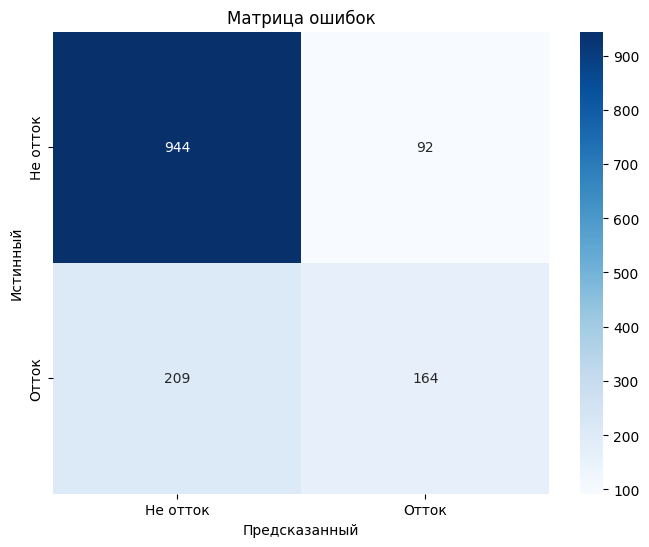

In [35]:
# Оценка производительности:

# Используем различные метрики для оценки модели.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Построение матрицы ошибок
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Не отток', 'Отток'], yticklabels=['Не отток', 'Отток'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный')
plt.ylabel('Истинный')
plt.show()

6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

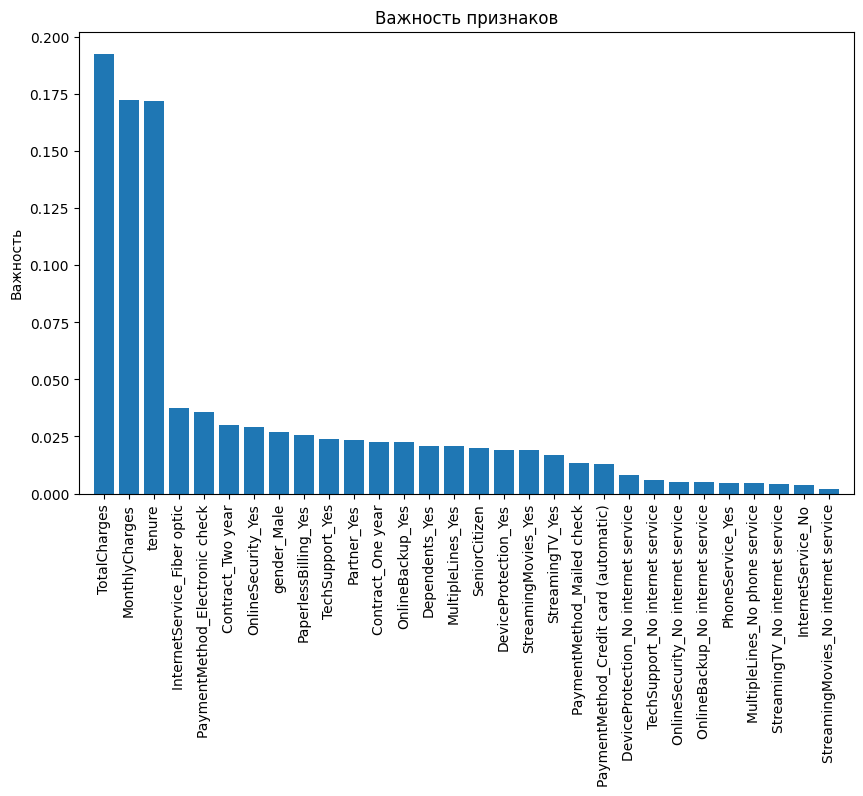

In [36]:
# Анализ важности признаков:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Важность')
plt.show()

7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.

Изменение параметров модели:

In [37]:
# Пробуем различные параметры для случайного леса.
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy: 0.8112136266855926


Использование кросс-валидации:

In [38]:
# Для более надежной оценки производительности модели.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validated accuracy: {scores.mean()}')

Cross-validated accuracy: 0.8016485942641461


Попробовать другие модели:

In [39]:
# логистическую регрессию или градиентный бустинг.
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

print(classification_report(y_test, log_y_pred))
print(f'Accuracy: {accuracy_score(y_test, log_y_pred)}')

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Accuracy: 0.8211497515968772


Оптимизация гиперпараметров:

In [28]:
# Использование GridSearchCV для поиска оптимальных параметров.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
